# **Model Building using ANN:**

- Since our previous model struggled to effectively capture the dataset's patterns, we will now build a model using an Artificial Neural Network (ANN) to enhance accuracy and improve performance.

## **1.0 Importing Libraries**

In [ ]:
# For data Manipulation
import pandas as pd
# For data Vsualization
import matplotlib.pyplot as plt
import seaborn as sns
# To load and dump
import pickle
# ML Stuff
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
# Train Test Split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load Dataset
df=pd.read_csv("../Artifacts/cleaned_data.csv")

In [28]:
# Sneak peak of dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroups,BalanceCategory
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31-45,No Balance
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31-45,50k-100k
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31-45,>150k
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-45,No Balance
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31-45,100k-150k


In [29]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  AgeGroups        10000 non-null  object 
 12  BalanceCategory  10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [30]:
with open("../Artifacts/preprocessor.pkl","rb") as file:
    preprocessor=pickle.load(file)

## **3.0 Splitting Data**

In [31]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [32]:
X=preprocessor.transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

## **4.0 Building ANN**

In [34]:
def create_model(optimizer="adam", activation="relu", neurons=64, dropout=0.2, learning_rate=0.001):
    optimizers = {
        "adam": Adam,
        "sgd": SGD,
        "rmsprop": RMSprop,
        "adagrad": Adagrad
    }
    optimizer_instance = optimizers[optimizer](learning_rate=learning_rate)
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout))
    model.add(Dense(neurons // 2, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(neurons // 4, activation=activation))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizer_instance, loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [35]:
# Use model=create_model and pass the activation parameter
model = KerasClassifier(model=create_model, verbose=1)

In [ ]:
params = {
    'model__optimizer': ['adam'], 
    'model__activation': ['relu'], 
    'batch_size': [32, 64],       
    'epochs': [50, 100],         
    'model__learning_rate': [0.001, 0.01],  
    'model__neurons': [32, 64],     
    'model__dropout': [0.2],      
}

In [37]:
# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 0.5473 - accuracy: 0.7526
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4631 - accuracy: 0.7968
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.8055
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.8108
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.8095
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.8105
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4369 - accuracy: 0.8110
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.8126
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4353 - accuracy: 0.8129
Epoch 10/50
250/250 [==================

GridSearchCV(cv=3,
             estimator=KerasClassifier(model=<function create_model at 0x00000281551449D0>),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'epochs': [50, 100],
                         'model__activation': ['relu'], 'model__dropout': [0.2],
                         'model__learning_rate': [0.001, 0.01],
                         'model__neurons': [32, 64],
                         'model__optimizer': ['adam']},
             verbose=1)

In [38]:
# Best Parameters
grid_search.best_params_

{'batch_size': 32,
 'epochs': 50,
 'model__activation': 'relu',
 'model__dropout': 0.2,
 'model__learning_rate': 0.001,
 'model__neurons': 32,
 'model__optimizer': 'adam'}

In [39]:
# Best Accuracy it can 
grid_search.best_score_

0.8189993692648884

In [48]:
# Predict on test data
y_pred = grid_search.best_estimator_.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 3ms/step
Test Accuracy: 0.8240


In [50]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1610
           1       0.60      0.29      0.39       390

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.80      0.82      0.80      2000



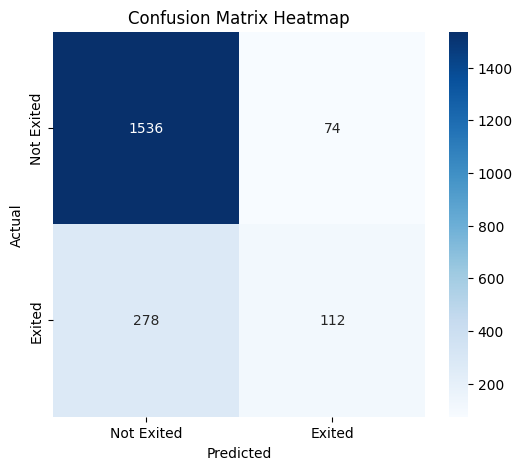

In [59]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Exited", "Exited"], yticklabels=["Not Exited", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
# Saving Model
grid_search.best_estimator_.model_.save("../Artifacts/ANN_model.h5")

## **5.0 Conclusion**

In this notebook, we built an Artificial Neural Network (ANN) model to predict customer churn. The key steps involved were:

- Data Preprocessing: Cleaned the dataset and applied transformations using a preprocessor.
  
- Feature Engineering: Converted categorical variables and created meaningful groups.
  
- Model Building: Designed an ANN with multiple hidden layers, Dropout for regularization, and various optimizers.
  
- Hyperparameter Tuning: Used GridSearchCV to optimize activation functions, learning rates, and batch sizes.
  
- Evaluation: The best ANN model achieved an accuracy of 82.4% on the test set.
  
- Visualization: A confusion matrix heatmap was plotted to analyze the model’s performance.

**Key Findings:**

- The ANN model performed well, correctly predicting most cases.
- Precision and recall scores indicated a slight imbalance in predicting churned customers.
- Further improvements could include handling class imbalance (e.g., SMOTE, weighted loss functions) or fine-tuning hyperparameters further.

Overall, this ANN model provides valuable insights into customer retention strategies, helping businesses take proactive measures to reduce churn.